In [35]:
from calendar import HTMLCalendar
from html2image import Html2Image
from PIL import Image

def generate_html_calendar(year, month):
    # 创建HTMLCalendar对象
    cal = HTMLCalendar()
    
    # 生成指定年月的HTML日历
    html_calendar = cal.formatmonth(year, month)
    
    # 添加自定义CSS样式
    css = """
    <style>
        body {
            margin: 0;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            background-color: #f0f0f0;
        }
        table {
            border-collapse: collapse;
            width: 100%;
            height: 100%;
            table-layout: fixed;
        }
        th, td {
            border: 1px solid #ccc;
            text-align: center;
            vertical-align: middle;
            font-size: 4em;
            padding: 10px;
        }
        th {
            background-color: #ddd;
        }
        td {
            background-color: #fff;
        }
    </style>
    """
    
    # 将CSS样式添加到HTML日历中
    html_calendar = f"<html><head>{css}</head><body>{html_calendar}</body></html>"
    
    return html_calendar

def html_to_image(html_content, output_image, image_size=(1872, 1404)):
    # 创建Html2Image对象
    hti = Html2Image(size=image_size)
    
    # 将HTML内容转换为图片
    hti.screenshot(html_str=html_content, save_as=output_image)

def rotate_image(input_image, output_image, angle=90):
    # 打开图片
    img = Image.open(input_image)
    
    # 旋转图片
    rotated_img = img.rotate(angle, expand=True)
    
    # 保存旋转后的图片
    rotated_img.save(output_image)

def main():
    years = [2024, 2025]
    months = range(1, 13)
    for year in years:
        for mon in months:
            html_calendar = generate_html_calendar(year, mon)
            fn = f'cal{year}{mon:02}.png'
            # 将HTML日历转换为图片
            html_to_image(html_calendar, fn)
            
            # 旋转图片
            rotated_fn = f'rcal{year}{mon:02}.png'
            rotate_image(fn, rotated_fn)


In [40]:
from calendar import HTMLCalendar
from playwright.sync_api import sync_playwright
from PIL import Image

def generate_html_calendar(year, month):
    # 创建HTMLCalendar对象
    cal = HTMLCalendar()
    
    # 生成指定年月的HTML日历
    html_calendar = cal.formatmonth(year, month)
    
    # 添加自定义CSS样式
    css = """
    <style>
        body {
            margin: 0;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            background-color: #f0f0f0;
        }
        table {
            border-collapse: collapse;
            width: 100%;
            height: 100%;
            table-layout: fixed;
        }
        th, td {
            border: 1px solid #ccc;
            text-align: center;
            vertical-align: middle;
            font-size: 4em;
            padding: 10px;
        }
        th {
            background-color: #ddd;
        }
        td {
            background-color: #fff;
        }
    </style>
    """
    
    # 将CSS样式添加到HTML日历中
    html_calendar = f"<html><head>{css}</head><body>{html_calendar}</body></html>"
    
    return html_calendar

def html_to_image(html_content, output_image, image_size=(1872, 1404)):
    with sync_playwright() as p:
        # 启动浏览器
        browser = p.chromium.launch()
        page = browser.new_page()
        
        # 设置页面尺寸
        page.set_viewport_size({"width": image_size[0], "height": image_size[1]})
        
        # 将HTML内容加载到页面
        page.set_content(html_content)
        
        # 截取页面截图并保存
        page.screenshot(path=output_image, full_page=True)
        
        # 关闭浏览器
        browser.close()

def rotate_image(input_image, output_image, angle=270):
    # 打开图片
    img = Image.open(input_image)
    
    # 旋转图片
    rotated_img = img.rotate(angle, expand=True)
    
    # 保存旋转后的图片
    rotated_img.save(output_image)

def pmain():
    years = [2024, 2025]
    months = range(1, 13)
    for year in years:
        for mon in months:
            html_calendar = generate_html_calendar(year, mon)
            fn = f'cal{year}{mon:02}.png'
            # 将HTML日历转换为图片
            html_to_image(html_calendar, fn)
            
            # 旋转图片
            rotated_fn = f'cal{year}{mon:02}_rotated.png'
            rotate_image(fn, rotated_fn)


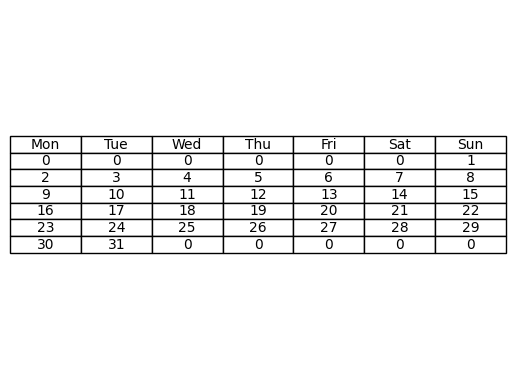

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import calendar

def generate_calendar_image(year, month):
    # 获取指定年月的日历
    cal = calendar.monthcalendar(year, month)
    
    # 创建一个新的图形
    fig, ax = plt.subplots()

    
    # 设置表格的列标题
    col_labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
    
    # 创建表格
    ax.table(cellText=cal, colLabels=col_labels, cellLoc='center', loc='center')
    
    # 隐藏坐标轴
    ax.axis('off')
    
    # 显示图像
    plt.show()

# 生成2023年10月的日历图片
generate_calendar_image(2023, 10)